![跟踪器](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FApplied+Forecasting&file=Vertex+AI+Pipelines+-+Prophet.ipynb)
<!--- header table --->  
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20Forecasting/Vertex%20AI%20Pipelines%20-%20Prophet.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>在Colab中运行
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FApplied%2520Forecasting%2FVertex%2520AI%2520Pipelines%2520-%2520Prophet.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>在Colab Enterprise中运行
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20Forecasting/Vertex%20AI%20Pipelines%20-%20Prophet.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>在GitHub上查看
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Applied%20Forecasting/Vertex%20AI%20Pipelines%20-%20Prophet.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>在Vertex AI Workbench中打开
    </a>
  </td>
</table>

# Vertex AI管道 - Prophet

**故障排除 - 也参考这个[官方笔记本](https://github.com/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/tabular_workflows/prophet_on_vertex_pipelines.ipynb)**

在[Vertex AI自定义模型 - Prophet - 在笔记本中](./Vertex%20AI%20Custom%20Model%20-%20Prophet%20-%20In%20Notebook.ipynb) 和 [Vertex AI自定义模型 - Prophet - 使用自定义容器进行自定义作业](./Vertex%20AI%20Custom%20Model%20-%20Prophet%20-%20Custom%20Job%20With%20Custom%20Container.ipynb) 这两个笔记本中，[Prophet](https://github.com/facebook/prophet) 被用来拟合一个预测模型，对在[BigQuery时间序列预测数据回顾和准备](./BigQuery%20Time%20Series%20Forecasting%20Data%20Review%20and%20Preparation.ipynb)中准备的citibike自行车租赁每日数量数据进行预测。

这个笔记本使用了一个[Vertex AI Pipeline](https://cloud.google.com/vertex-ai/docs/pipelines/introduction)，该管道预先构建好，可以处理构建预测模型和检索预测结果的代码。它实际上做了更多事情，比如并行拟合多个时间序列，在指定的窗口中对预测算法进行回测，以及使用Prophet文档中推荐的参数进行网格搜索进行超参数调整。

这个项目使用Prophet，但 orchestrate 步骤的管道是由[Kubeflow Pipelines SDK](https://www.kubeflow.org/docs/components/pipelines/v2/introduction/)构建的，并在Vertex AI管道的托管环境中运行。管道步骤在组件中运行，这些组件在相关的容器中运行相关代码。虽然这些组件可以由用户定制构建，但在这种情况下，管道完全是[预先构建的](https://cloud.google.com/vertex-ai/docs/pipelines/components-introduction)，因此只需提供函数的输入即可驱动管道执行。

---

**系列介绍**

[这个系列](./readme.md) 探讨了使用Vertex AI、BigQuery ML和其他开源框架进行预测。预测包括跟踪随时间变化的测量结果，并探讨趋势、季节性的影响（年、月、日等）、假期和特殊事件，希望利用这些见解预测近期的未来。一些方法还包括考虑影响需求的可观测测量结果，以理解关系并使预测更准确。

**数据来源：纽约市Citibike租赁**

这个系列使用了纽约市的Citibike租赁数据。将选择靠近中央公园的自行车站，跟踪这些站点始发的每日自行车行程数量。这将展示一些常见的预测问题，因为随着时间的推移，新站点被引入，有些站点只有最近几个月或几周的数据。数据可以在BigQuery公共数据集中找到：
- `bigquery-public-data.new_york.citibike_trips`
- `bigquery-public-data.new_york.citibike_stations`

**Prophet**

[Prophet](https://github.com/facebook/prophet) 是一个用于自定义预测的开源解决方案。Prophet基于[Stan](https://mc-stan.org/)，一个概率编程语言，并已在Python和R中实现。Prophet旨在对异常值和缺失数据具有鲁棒性，同时也是可定制的，可以加入关于预测的领域知识。
- [Prophet研究论文](https://peerj.com/preprints/3190/)
- [Prophet文档](https://facebook.github.io/prophet/docs/quick_start.html)

---

**先决条件：**
- [BigQuery时间序列预测数据回顾和准备](./BigQuery%20Time%20Series%20Forecasting%20Data%20Review%20and%20Preparation.ipynb)
    - 为本笔记本准备数据

**资源**
- [BigQuery](https://cloud.google.com/bigquery/docs/introduction)
    - [BigQuery Python客户端](https://cloud.google.com/python/docs/reference/bigquery/latest)
    - [SQL参考](https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax)
- [Vertex AI](https://cloud.google.com/vertex-ai/docs/start/introduction-unified-platform)
    - [Vertex AI管道](https://cloud.google.com/vertex-ai/docs/pipelines/introduction)
    - [Vertex AI Python SDK](https://cloud.google.com/python/docs/reference/aiplatform/latest)
    - [Vertex AI预测管道Prophet](https://cloud.google.com/vertex-ai/docs/tabular-data/forecasting-prophet)
    - Google Cloud管道组件（预构建）：
        - [文档](https://cloud.google.com/vertex-ai/docs/pipelines/components-introduction)
        - [SDK参考](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-1.0.41/)
- Prophet
    - [Prophet论文](https://peerj.com/preprints/3190/)
    - [文档](documentation)

Colab 设置

要在 Colab 中运行此笔记本，请点击 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20Forecasting/Vertex%20AI%20Pipelines%20-%20Prophet.ipynb) 并运行本节中的单元格。否则，请跳过此部分。

此单元将进行 GCP (Google Cloud Platform) 的身份验证（按照弹出窗口中的提示操作）。

In [1]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [2]:
try:
    import google.colab
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
except Exception:
    pass

## 安装和API启用

客户端软件包可能需要在此环境中安装。

### 安装（如有需要）

In [3]:
# tuples of (import name, install name)
packages = [
    ('google_cloud_pipeline_components', 'google-cloud-pipeline-components'),
    ('plotly', 'plotly'),
    ('kaleido', 'kaleido')
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user

### 重新启动内核（如果发生安装）

在重新启动内核后，代码提交可以从此单元格的下一个开始。

In [4]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

---
## 设置

输入:

In [6]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [7]:
REGION = 'us-central1'
EXPERIMENT = 'pipeline-prophet'
SERIES = 'applied-forecasting'

BQ_PROJECT = PROJECT_ID
BQ_DATASET = SERIES.replace('-','_')
BQ_TABLE = 'forecasting-data_prepped'

viz_limit = 12

包裹:

In [26]:
from google.cloud import bigquery
from google.cloud import aiplatform

#from google_cloud_pipeline_components.experimental.automl.forecasting import utils
from google_cloud_pipeline_components.v1.automl.forecasting import utils

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

客户:

In [27]:
bq = bigquery.Client(project = PROJECT_ID)
aiplatform.init(project=PROJECT_ID, location=REGION)

参数:

In [28]:
TIMESTAMP = datetime.now().strftime("%Y%m%d%H%M%S")

In [29]:
SERVICE_ACCOUNT = !gcloud config list --format='value(core.account)' 
SERVICE_ACCOUNT = SERVICE_ACCOUNT[0]
SERVICE_ACCOUNT

'1026793852137-compute@developer.gserviceaccount.com'

## 时间序列回顾

**单变量预测**由每个时间序列的2列组成：
- `TARGET_COLUMN` = 需求测量。
    在我们的案例中，这是某一自行车站每天所进行的出行次数-一天中出行次数的总和。
- `TIME_COLUMN` = 需求的时间。
    表示为与预测练习的粒度相关的时间或日期单位。在我们的案例中，需求以日为单位测量，因此时间列准备为日期。

**附加列**用于指导预测算法的数据处理：
- `SERIES_COLUMN`将与同一时间序列相关的行分组。
    - 进行多重预测，即每个时间序列一个，意味着包括第三列以捕捉每个时间序列的行组：`SERIES_COLUMN`。
    - **注意：** Prophet为每个这些组拟合一个独立的预测。在我们的案例中，这是每个个人Citibike站附近的`start_station_name`或名称。
- `SPLITS_COLUMN`将每个时间序列内的连续行分组，以在预测过程中使用。
    - 这些数据在预备笔记本中已设置了`TRAIN`、`VALIDATE`和`TEST`的切割。包含这些切割的列可以在训练期间被选择的预测方法使用，而不是由该方法计算切割。这在比较多种不同方法时非常有用，因为它确保了在每种方法中处理切割的方式都是一样的。

**预测参数**：
- `FORECAST_GRANULARITY`是测量频率，如分钟、小时、天、周、月、年
    - 数据在数据准备笔记本中以天为单位汇总
    - 这是测量之间的时间-行数量
    - 对于不同的粒度，您可能需要将需求信号汇总为不同时间组件的`总和`、`最小值`、`最大值`或`平均值`。
    - 粒度规范因方法而异：
        - BigQuery ML: 每分钟、每小时、每天、每周、每月、每季度、每年
        - Prophet（包括Vertex预构建管道）：分钟、小时、天、周、月或年
        - Vertex AI AutoML: 分钟、小时、天、周、月、年
    - 一个非常有用的BigQuery函数用于提取时间和日期的组件是`EXTRACT`函数：
        - [作为日期函数提取](https://cloud.google.com/bigquery/docs/reference/standard-sql/date_functions#extract)
        - [作为时间函数提取](https://cloud.google.com/bigquery/docs/reference/standard-sql/time_functions#extract)
        - [作为日期时间函数提取](https://cloud.google.com/bigquery/docs/reference/standard-sql/datetime_functions#extract)。
- `FORECAST_TEST_LENGTH`是分配到测试区域的行数
    - 这是以`FORECAST_GRANULARITY`为单位的。
    - 数据准备包括设置这个值来指定每个时间序列的`SERIES_COLUMMN`中的`SPLITS_COLUMN = 'TEST'`值。
- `FORCAST_VALIDATE_LENGTH`是分配到验证区域的行数
    - 这是以`FORECAST_GRANULARITY`为单位的。
    - 数据准备包括设置这个值来指定每个时间序列的`SERIES_COLUMN`中的`SPLITS_COLUMN = 'VALIDATE'`值。
- `FORECAST_HORIZON_LENGTH`是预测未来超出测试区域的行数
    - 这是以`FORECAST_GRANULARITY`为单位的。
    - 这需要作为预测方法的输入来设置。

In [30]:
# CUSTOMIZE
TARGET_COLUMN = 'num_trips'
TIME_COLUMN = 'starttime'
SERIES_COLUMN = 'start_station_name'
SPLIT_COLUMN = 'splits'

# CUSTOMIZE
FORECAST_GRANULARITY = 'day' # the data preparation included preparing the data at this level
    # note that the prophet pipeline will not accept DAY, as it expect lowercase day
FORECAST_HORIZON_LENGTH = 14
FORECAST_TEST_LENGTH = 14 # the data preparation included setting this value for splits = TEST
FORECAST_VALIDATE_LENGTH = 14 # the data preparation included setting this value for splits = VALIDATE

从拆分中检索关键日期。数据经先决笔记本处理时定义了拆分。这将从准备好的数据中检索信息。

In [31]:
query = f"""
    WITH
        SPLIT AS (
            SELECT {SPLIT_COLUMN}, min({TIME_COLUMN}) as mindate, max({TIME_COLUMN}) as maxdate
            FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
            GROUP BY splits
        ),
        TRAIN AS (
            SELECT mindate as start_date
            FROM SPLIT
            WHERE {SPLIT_COLUMN} ='TRAIN'
        ),
        VAL AS (
            SELECT mindate as val_start
            FROM SPLIT
            WHERE {SPLIT_COLUMN} = 'VALIDATE'
        ),
        TEST AS (
            SELECT mindate as test_start, maxdate as end_date
            FROM SPLIT
            WHERE {SPLIT_COLUMN} = 'TEST'
        )
    SELECT * EXCEPT(pos) FROM
    (SELECT *, ROW_NUMBER() OVER() pos FROM TRAIN)
    JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM VAL)
    USING (pos)
    JOIN (SELECT *, ROW_NUMBER() OVER() pos FROM TEST)
    USING (pos)
"""
keyDates = bq.query(query).to_dataframe()
keyDates

start_date   val_start  test_start    end_date
0  2013-07-01  2016-09-03  2016-09-17  2016-09-30

将`FORECAST_TEST_LENGTH`和`FORECAST_VALIDATE_LENGTH`的设定值更正为与准备好的数据匹配：

In [32]:
if FORECAST_TEST_LENGTH != (keyDates['end_date'][0] - keyDates['test_start'][0]).days + 1:
    FORECAST_TEST_LENGTH = (keyDates['end_date'][0] - keyDates['test_start'][0]).days + 1
    
if FORECAST_VALIDATE_LENGTH != (keyDates['test_start'][0] - keyDates['val_start'][0]).days:
    FORECAST_VALIDATE_LENGTH = (keyDates['test_start'][0] - keyDates['val_start'][0]).days
    
print('FORECAST_TEST_LENGTH is ', FORECAST_TEST_LENGTH)
print('FORECAST_VALIDATE_LENGTH is ', FORECAST_VALIDATE_LENGTH)

FORECAST_TEST_LENGTH is  14
FORECAST_VALIDATE_LENGTH is  14


检索原始数据:

In [33]:
query = f"""
    SELECT {SERIES_COLUMN}, {TIME_COLUMN}, {SPLIT_COLUMN}, {TARGET_COLUMN}
    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
    ORDER by {SERIES_COLUMN}, {TIME_COLUMN}
"""
rawSeries = bq.query(query).to_dataframe()

创建一个交互式图表，用于查看单个时间序列（自行车站）并通过使用[Plotly](https://plotly.com/python/)滚动浏览时间范围。

In [34]:
# NA values in Pandas will not convert to JSON which Plotly uses:
rawSeries = rawSeries.fillna(np.nan).replace([np.nan], [None])

# create a figure:
fig = go.Figure()

# get a list of colors to use:
colors = px.colors.qualitative.Plotly

# list of columns to plot over time : target and covariates
variables = [TARGET_COLUMN] # + COVARIATE_COLUMNS # no covariate for univarate forecasting

# create dropdown/button to toggle series
buttons = []
b = 0 # default button index

# iterate through series:
series = rawSeries[SERIES_COLUMN].unique().tolist()[0:viz_limit]
for s in series:
    # iterate trhough columns
    for y, v in enumerate(variables):
        fig.add_trace(
            go.Scatter(
                x = rawSeries[rawSeries[SERIES_COLUMN]==s][TIME_COLUMN],
                y = rawSeries[rawSeries[SERIES_COLUMN]==s][v],
                name = f'{v}',
                text = rawSeries[rawSeries[SERIES_COLUMN]==s][v],
                yaxis = f"y{y+1}",
                hoverinfo='name+x+text',
                line = {'width': 0.5},
                marker = {'size': 8},
                mode = 'lines+markers',
                showlegend = False,
                visible = (b==0) # make a series visible as default: this uses the first series
            )
        )
    
    # which button to show:
    ff = 0 # count of forecast related traces add to each series
    which_buttons = [False] * len(series) * (len(variables) + ff)
    which_buttons[b * (len(variables) +ff):(b+1)*(len(variables) + ff)] = [True] * (len(variables) + ff)

    # create button for series:
    button = dict(
        label = s,
        method = 'update',
        args = [{'visible': which_buttons}]
    )
    buttons.append(button)
    b += 1

# add split regions: training
fig.add_shape(
    fillcolor = 'rgba(0, 255, 0, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['start_date'][0],
    x1 = keyDates['val_start'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['val_start'][0] - (keyDates['test_start'][0]-keyDates['val_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Training',
    yanchor = 'bottom'
)

# add split regions: validation
fig.add_shape(
    fillcolor = 'rgba(255, 255, 0, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['val_start'][0],
    x1 = keyDates['test_start'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['val_start'][0] + (keyDates['test_start'][0]-keyDates['val_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Validation',
    yanchor = 'bottom'
)

# add split regions: test
fig.add_shape(
    fillcolor = 'rgba(0, 0, 255, 0.2)',
    line = {'width': 0},
    type = 'rect',
    x0 = keyDates['test_start'][0],
    x1 = keyDates['end_date'][0],
    xref = 'x',
    y0 = 0,
    y1 = 1,
    yref = 'paper'
)
fig.add_annotation(
    x = keyDates['test_start'][0] + (keyDates['end_date'][0]-keyDates['test_start'][0])/2,
    y = 0,
    ax = 0, ay = 0,
    yref = 'y1',
    xref = 'x',
    text = 'Test',
    yanchor = 'bottom'
)

# configure axes layout:
layout = dict(
    xaxis =  dict(
        range = [keyDates['end_date'][0] - 2*(keyDates['end_date'][0] - keyDates['val_start'][0]), keyDates['end_date'][0]],
        rangeslider = dict(
            autorange = True,
            range = [keyDates['start_date'][0], keyDates['end_date'][0]]
        ),
        type = 'date'
    )
)
for v, variable in enumerate(variables):
    layout[f'yaxis{v+1}'] = dict(
        anchor = 'x',
        domain = [v*(1/len(variables)), (v+1)*(1/len(variables))],
        autorange = True,
        mirror = True,
        autoshift = True,
        title = dict(text = variable, standoff = 10 + 20 * (v % 2), font = dict(color = colors[v])),
        tickfont = dict(color = colors[v]),
        tickmode = 'auto',
        linecolor = colors[v],
        linewidth = 4,
        showline = True,
        side = 'right',
        type = 'linear',
        zeroline = False
    )

# final update of display before rendering
fig.update_layout(
    layout,
    title = 'Time Series Plots:',
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=600,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100
    ),
    updatemenus = [
        dict(
            buttons = buttons,
            type = 'dropdown',
            direction = 'down',
            x = 1,
            y = 1.2,
            showactive = True
        )
    ]
)

# render the interactive plot:
fig.show()

A Snapshot of the interactive plot:


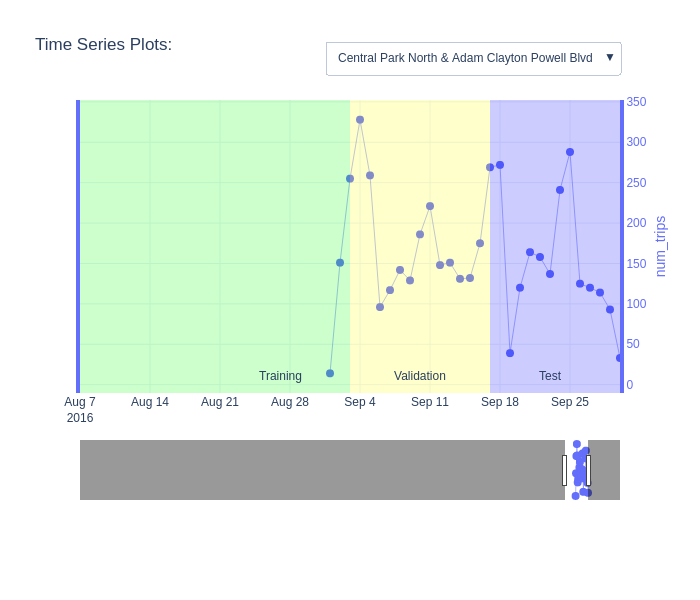

In [35]:
print('A Snapshot of the interactive plot:')
fig.show('png')

## 创建预测模型

在这个笔记本中，我们使用一个名为[Prophet](https://github.com/facebook/prophet)的开源解决方案进行定制预测。Prophet是基于[Stan](https://mc-stan.org/)构建的，它是一种概率编程语言，并且在Python和R中实现。Prophet被设计成对异常值和缺失数据具有鲁棒性，同时也支持定制化，您可以添加关于预测的领域知识。

培训管道

创建培训管道规范

与在[Vertex AI Custom Model - Prophet - In Notebook](./Vertex%20AI%20Custom%20Model%20-%20Prophet%20-%20In%20Notebook.ipynb)笔记本和[Vertex AI Custom Model - Prophet - Custom Job With Custom Container](./Vertex%20AI%20Custom%20Model%20-%20Prophet%20-%20Custom%20Job%20With%20Custom%20Container.ipynb)笔记本中所做的直接与Prophet交互不同，此示例使用在Vertex AI Pipelines上运行的预构建管道。这意味着只需提供参数，让它代表我们进行编码工作。它实际上做了更多的事情，如并行拟合多个时间序列，在指定窗口中对预测算法进行反向测试，以及使用Prophet文档推荐的参数进行网格搜索进行超参数调整。 (https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning)。

链接到用于[utils.get_prophet_train_pipeline_and_parameters](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-1.0.41/google_cloud_pipeline_components.experimental.automl.forecasting.html#google_cloud_pipeline_components.experimental.automl.forecasting.utils.get_prophet_train_pipeline_and_parameters)的SDK。

In [16]:
train_job_spec_path, train_parameter_values = utils.get_prophet_train_pipeline_and_parameters(
    root_dir = f'gs://{PROJECT_ID}/{SERIES}/{EXPERIMENT}',
    project = PROJECT_ID,
    location = REGION,
    time_column = TIME_COLUMN,
    time_series_identifier_column = SERIES_COLUMN,
    target_column = TARGET_COLUMN,
    forecast_horizon = FORECAST_HORIZON_LENGTH,
    data_granularity_unit = FORECAST_GRANULARITY,
    predefined_split_key = SPLIT_COLUMN,
    data_source_bigquery_table_path = f'bq://{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}',
    window_stride_length = 1,
    
    trainer_dataflow_machine_type = "n1-standard-2",
    trainer_dataflow_max_num_workers = 5,
    evaluation_dataflow_machine_type = "n1-standard-1",
    evaluation_dataflow_max_num_workers = 1,
    dataflow_service_account = SERVICE_ACCOUNT,
    
    max_num_trials = 2,
    optimization_objective = 'rmse'
)

运行训练管道

链接到[aiplatform.PipelineJob()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.PipelineJob) 的SDK。

In [17]:
training_pipeline_job = aiplatform.PipelineJob(
    job_id = f'{SERIES}-{EXPERIMENT}-{TIMESTAMP}',
    display_name = f'{SERIES}-{EXPERIMENT}-{TIMESTAMP}',
    pipeline_root = f'gs://{PROJECT_ID}/{SERIES}/{EXPERIMENT}/pipeline_root',
    template_path = train_job_spec_path,
    parameter_values = train_parameter_values
)

关于SDK的链接：
- [aiplatform.PipelineJob.submit()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.PipelineJob#google_cloud_aiplatform_PipelineJob_submit)
    - 运行并且不等待
- [aiplatform.PipelineJob.run()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.PipelineJob#google_cloud_aiplatform_PipelineJob_run)
    - 运行并等待，同时在日志中报告进度

In [18]:
training_pipeline_job.submit(
    service_account=SERVICE_ACCOUNT
)

Creating PipelineJob
PipelineJob created. Resource name: projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-prophet-20231210193806
To use this PipelineJob in another session:
pipeline_job = aiplatform.PipelineJob.get('projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-prophet-20231210193806')
View Pipeline Job:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/applied-forecasting-pipeline-prophet-20231210193806?project=1026793852137


In [19]:
print(f'The Dashboard can be viewed here:\n{training_pipeline_job._dashboard_uri()}')

The Dashboard can be viewed here:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/applied-forecasting-pipeline-prophet-20231210193806?project=1026793852137


将以下英文文本翻译为中文：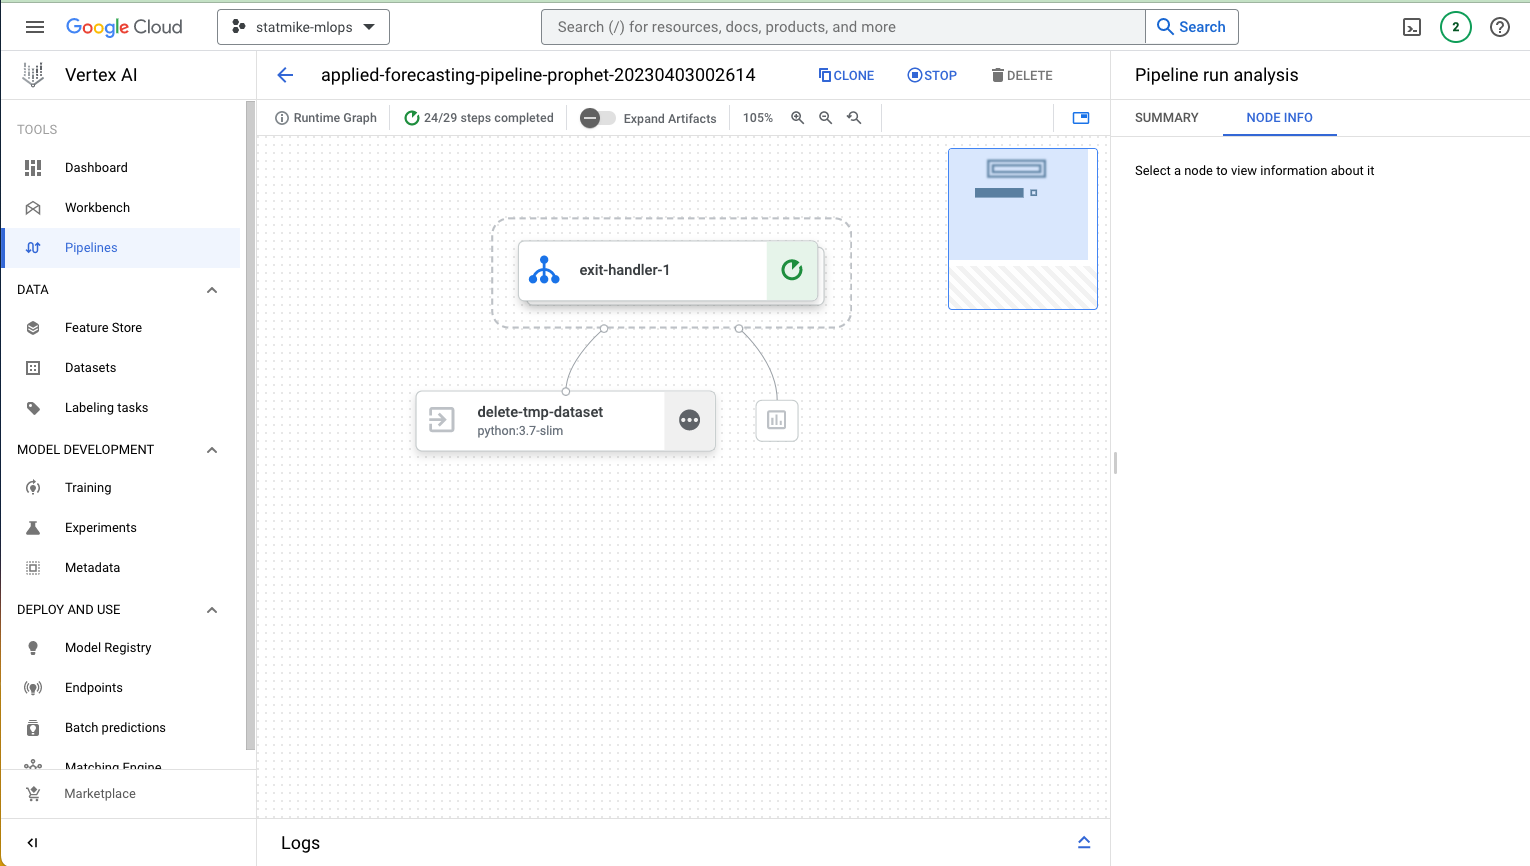 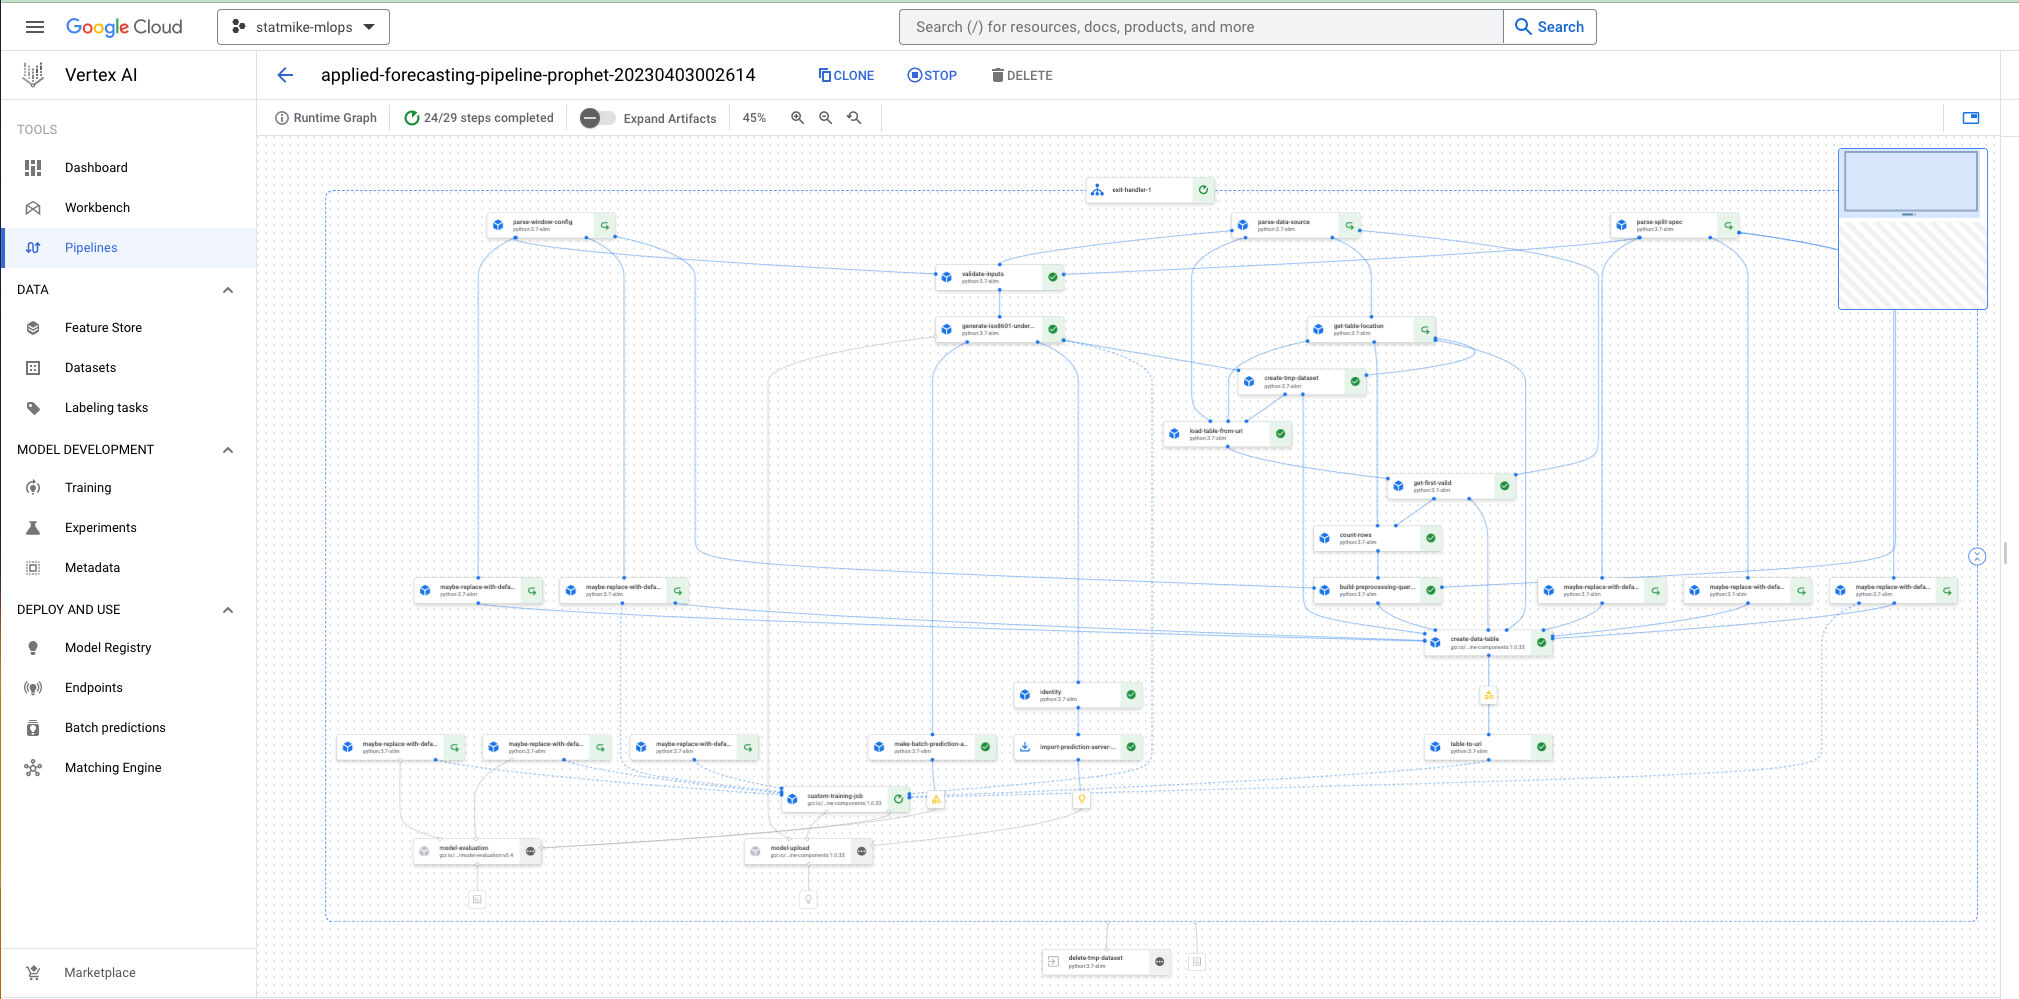

等待培训管道工作

In [20]:
training_pipeline_job.wait()

PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-prophet-20231210193806 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-prophet-20231210193806 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-prophet-20231210193806 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-prophet-20231210193806 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-prophet-20231210193806 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/applied-forecasting-pipeline-prophet-20231210193806 current 

### 审查培训流程工作

In [23]:
aiplatform.get_pipeline_df(pipeline = f'prophet-train').head(1)

pipeline_name                                           run_name  \
0  prophet-train  applied-forecasting-pipeline-prophet-202312101...   

  param.input:evaluation_dataflow_max_num_workers param.input:window_column  \
0                                             1.0                             

                param.input:dataflow_service_account  \
0  1026793852137-compute@developer.gserviceaccoun...   

  param.input:evaluation_dataflow_machine_type  \
0                                n1-standard-1   

  param.input:dataflow_use_public_ips param.input:location  \
0                                True          us-central1   

  param.input:trainer_dataflow_disk_size_gb  \
0                                      40.0   

  param.input:data_source_csv_filenames  ...    param.input:project  \
0                                        ...  statmike-mlops-349915   

  param.input:encryption_spec_key_name param.input:timestamp_split_key  \
0                                                                        

  param.input:bigquery_destination_uri param.input:trainer_service_account  \
0                                  NaN                                 NaN   

  metric.rSquared metric.meanAbsolutePercentageError  \
0             NaN                                NaN   

   metric.rootMeanSquaredLogError metric.meanAbsoluteError  \
0                             NaN                      NaN   

  metric.rootMeanSquaredError  
0                         NaN  

[1 rows x 40 columns]

列出管道任务

In [27]:
for task in training_pipeline_job.gca_resource.job_detail.task_details:
    print(task.task_name)

model-upload
wrapped-in-list
exit-handler-1
condition-2
table-to-uri
bigquery-query-job
model-evaluation-regression
applied-forecasting-pipeline-prophet-20231210193806
get-fte-suffix
get-table-location
validate-inputs
bigquery-delete-dataset-with-prefix
build-job-configuration-query
prophet-trainer
bigquery-create-dataset
feature-transform-engine


#### 获取模型评估

可以从组件输出中单独检索管道作业的参数。

In [28]:
for task in training_pipeline_job.gca_resource.job_detail.task_details:
    if task.task_name == "model-evaluation-regression":
        metrics = task.outputs["evaluation_metrics"].artifacts[0].metadata
        break
else:
    raise ValueError("Not Found.")
    
dict(metrics)

{'meanAbsoluteError': 40.0836,
 'meanAbsolutePercentageError': 67.796425,
 'rootMeanSquaredError': 61.072044,
 'rootMeanSquaredLogError': 0.5952818,
 'rSquared': 0.58523476}

#### 获取先知模型

培训流水线将最终模型注册到Vertex AI模型库中。

In [29]:
for task in training_pipeline_job.gca_resource.job_detail.task_details:
    if task.task_name == "model-upload":
        model = task.outputs["model"].artifacts[0].metadata["resourceName"]
        break
else:
    raise ValueError("Not Found.")
    
model

'projects/1026793852137/locations/us-central1/models/1106986107821621248'

In [30]:
vertex_model = aiplatform.Model(model)

In [31]:
vertex_model.name, vertex_model.resource_name

('1106986107821621248',
 'projects/1026793852137/locations/us-central1/models/1106986107821621248')

In [32]:
print(f'Review the model in the Vertex AI Model Registry:\nhttps://console.cloud.google.com/vertex-ai/locations/{REGION}/models/{vertex_model.name}?project={PROJECT_ID}')

Review the model in the Vertex AI Model Registry:
https://console.cloud.google.com/vertex-ai/locations/us-central1/models/1106986107821621248?project=statmike-mlops-349915


### 预测流水线

将原始训练数据子集化为测试记录：

In [37]:
query = f"""
    CREATE OR REPLACE VIEW `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_TEST` AS
    SELECT *
    FROM `{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}`
    WHERE {SPLIT_COLUMN} = 'TEST'
"""
query_job = bq.query(query)


In [44]:
query_job.result()
query_job.done(), query_job.state

(True, 'DONE')

In [45]:
vertex_model = aiplatform.Model('projects/1026793852137/locations/us-central1/models/1106986107821621248')


创建预测管道规范

链接到[utils.get_prophet_prediction_pipeline_and_parameters](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-1.0.41/google_cloud_pipeline_components.experimental.automl.forecasting.html#google_cloud_pipeline_components.experimental.automl.forecasting.utils.get_prophet_prediction_pipeline_and_parameters)的SDK。

In [46]:
predict_job_spec_path, predict_parameter_values = utils.get_prophet_prediction_pipeline_and_parameters(
    project = PROJECT_ID,
    location = REGION,
    model_name = vertex_model.resource_name,
    time_column = TIME_COLUMN,
    time_series_identifier_column = SERIES_COLUMN,
    target_column = TARGET_COLUMN,
    data_source_bigquery_table_path = f'{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}_TEST',
    bigquery_destination_uri = f"{BQ_PROJECT}.{BQ_DATASET}",
    machine_type = 'n1-standard-2',
    max_num_workers = 5
)

运行预测流程####

链接到 [aiplatform.PipelineJob()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.PipelineJob) 的 SDK

In [47]:
pipeline_job = aiplatform.PipelineJob(
    #job_id = f'prediction-{SERIES}-{EXPERIMENT}-{TIMESTAMP}',
    display_name = f'prediction-{SERIES}-{EXPERIMENT}-{TIMESTAMP}',
    pipeline_root = f'gs://{PROJECT_ID}/{SERIES}/{EXPERIMENT}/pipeline_root/prediction',
    template_path = predict_job_spec_path, #+'_new',
    parameter_values = predict_parameter_values
)

链接到SDK：
- [aiplatform.PipelineJob.submit()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.PipelineJob#google_cloud_aiplatform_PipelineJob_submit)
    - 运行但不等待
- [aiplatform.PipelineJob.run()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.PipelineJob#google_cloud_aiplatform_PipelineJob_run)
    - 运行并等待，将在日志中报告进展

In [48]:
pipeline_job.submit(
    service_account=SERVICE_ACCOUNT
)

Creating PipelineJob
PipelineJob created. Resource name: projects/1026793852137/locations/us-central1/pipelineJobs/prophet-predict-20231213152407
To use this PipelineJob in another session:
pipeline_job = aiplatform.PipelineJob.get('projects/1026793852137/locations/us-central1/pipelineJobs/prophet-predict-20231213152407')
View Pipeline Job:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/prophet-predict-20231213152407?project=1026793852137


In [49]:
print(f'The Dashboard can be viewed here:\n{pipeline_job._dashboard_uri()}')

The Dashboard can be viewed here:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/prophet-predict-20231213152407?project=1026793852137


请参考下图。
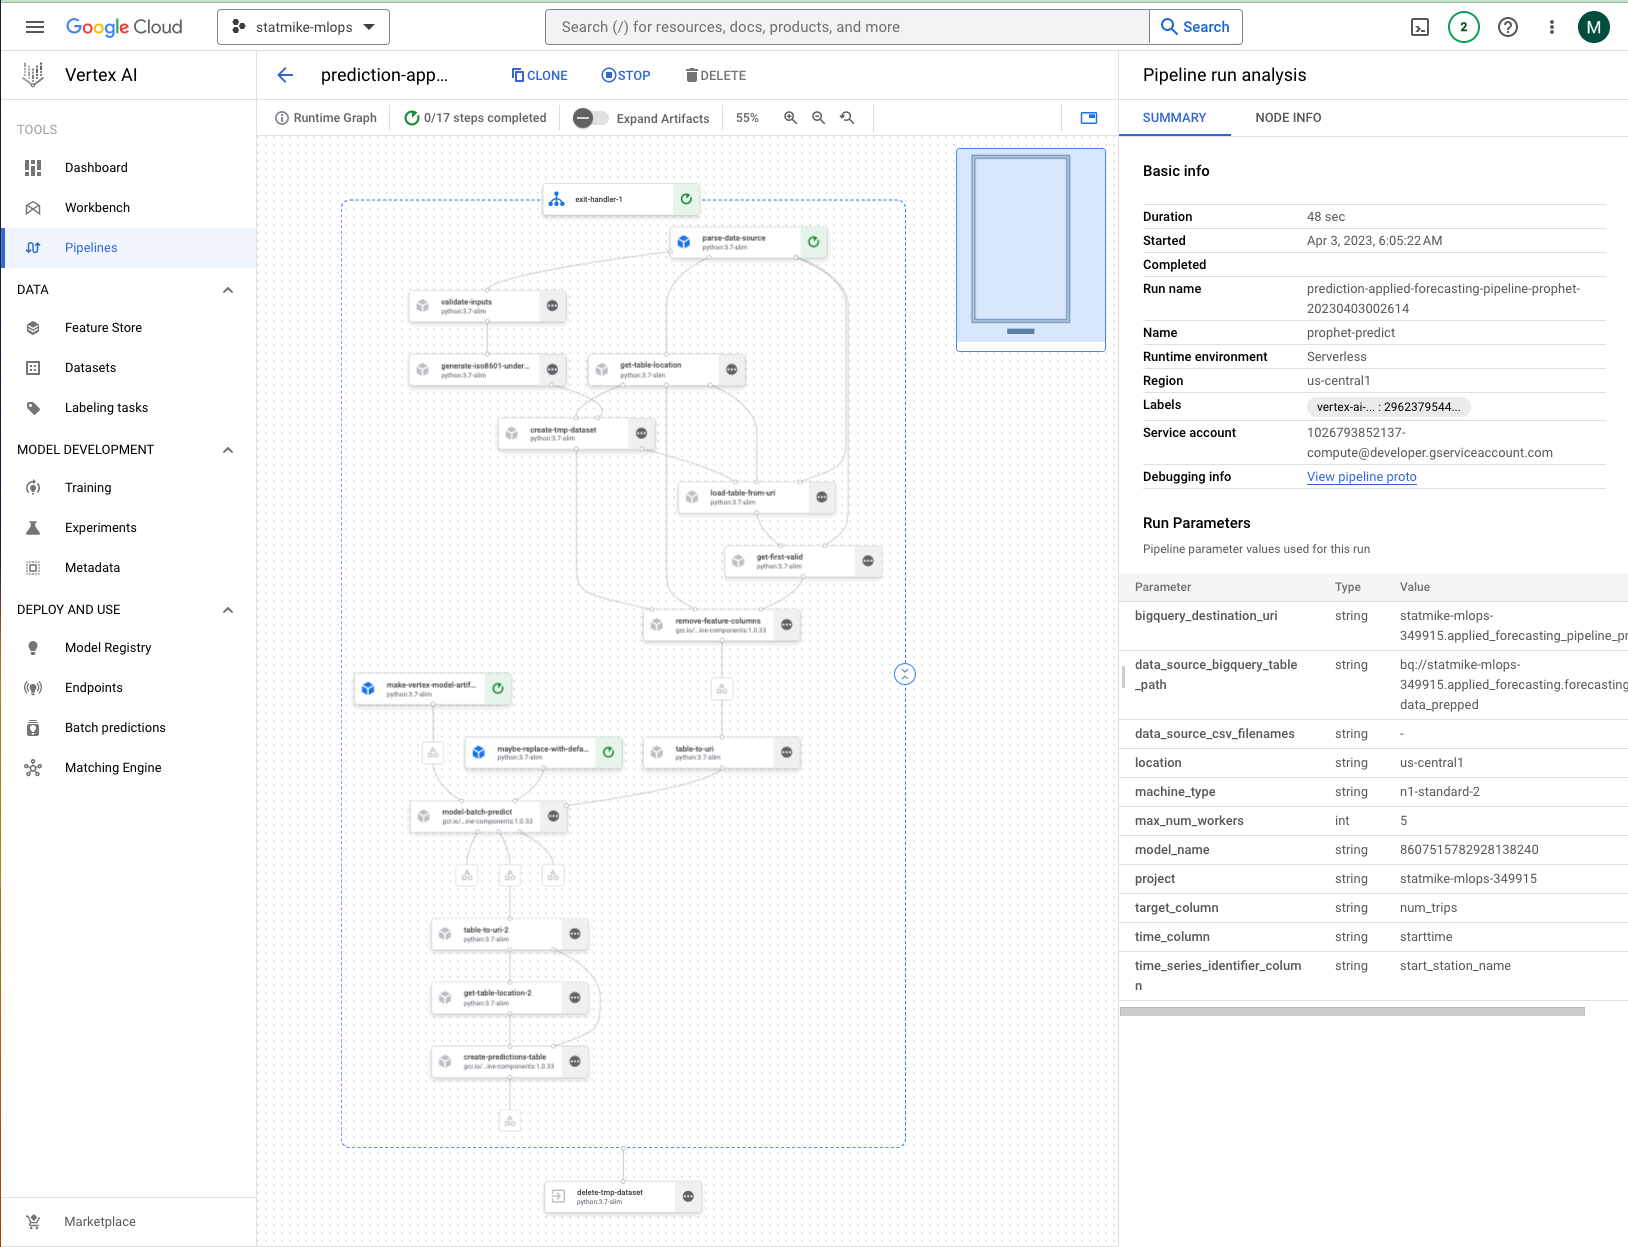

等待预测管道任务

In [50]:
pipeline_job.wait()

PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/prophet-predict-20231213152407 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/prophet-predict-20231213152407 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/prophet-predict-20231213152407 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/prophet-predict-20231213152407 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/prophet-predict-20231213152407 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/prophet-predict-20231213152407 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/prophet-pred

RuntimeError: Job failed with:
code: 9
message: "The DAG failed because some tasks failed. The failed tasks are: [exit-handler-1].; Job (project_id = statmike-mlops-349915, job_id = 9132297564580741120) is failed due to the above error.; Failed to handle the job: {project_number = 1026793852137, job_id = 9132297564580741120}"


#### 预测管道任务审阅

In [ ]:
aiplatform.get_pipeline_df(pipeline = f'prophet-prediction').head(1)

获取输出表名称

In [ ]:
for task in pipeline_job.gca_resource.job_detail.task_details:
    if task.task_name == "bigquery-query-job-2":
        pred_table = (
            task.outputs["destination_table"].artifacts[0].metadata["tableId"]
        )
        break
else:
    raise ValueError("Not Found.")
    
pred_table

获取预测

In [ ]:
query = f"""
    SELECT *, 
    FROM `{BQ_PROJECT}.{BQ_DATASET}_{EXPERIMENT.replace('-','_')}.{pred_table}`
"""
predictions = bq.query(query).to_dataframe()

In [ ]:
predictions.head()

## 用预测可视化时间序列

使用SQL计算指标

用于评估预测效果的一些常见指标包括
- MAPE，即平均绝对百分比误差
    - $\textrm{MAPE} = \frac{1}{n}\sum{\frac{\mid(实际 - 预测)\mid}{实际}}$
- MAE，即平均绝对误差
     - $\textrm{MAE} = \frac{1}{n}\sum{\mid(实际 - 预测)\mid}$
- MAE除以平均需求值，以便得到像MAPE一样的百分比
    - $\textrm{pMAE} = \frac{\sum{\mid(实际 - 预测)\mid}}{\sum{实际}}$
- MSE，即均方误差
    - $\textrm{MSE} = \frac{1}{n}\sum{(实际-预测)^2}$
- RMSE，即均方根误差
    - $\textrm{RMSE} = \sqrt{\frac{1}{n}\sum{(实际-预测)^2}}$
- RMSE除以平均需求值，以便得到像MAPE一样的百分比
    - $\textrm{pRMSE} = \frac{\sqrt{\frac{1}{n}\sum{(实际-预测)^2}}}{\frac{1}{n}\sum{实际}}$

显式计算这些指标可能有助于使不同数据集和模型之间的比较变得公平。本节演示了使用SQL进行这些计算。

>```sql
>(实际值 - 预测值) as diff
>
>
>AVG(SAFE_DIVIDE(ABS(diff), 实际值)) as MAPE,
>AVG(ABS(diff)) as MAE,
>SAFE_DIVIDE(SUM(ABS(diff)), SUM(实际值)) as pMAE,
>AVG(POW(diff, 2)) as MSE,
>SQRT(AVG(POW(diff, 2))) as RMSE,
>SAFE_DIVIDE(SQRT(AVG(POW(diff, 2)), AVG(实际值)) as pRMSE
>```